<a href="https://colab.research.google.com/github/StellaShabin/Flask/blob/main/Insurance_Cost_prediction_89_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

# Prompt to upload the file
uploaded = files.upload()



Saving insurance (1).csv to insurance (1).csv


In [3]:
# Replace 'insurance.csv' with the actual filename after uploading
df = pd.read_csv('insurance (1).csv')

# Display the first few rows
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df['BMI']=(df['Weight']/((df['Height']*100)*(df['Height']*100)))*10**8
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Select a subset of features for interaction and polynomial terms
interaction_features = df[['BMI', 'Age', 'NumberOfMajorSurgeries']]
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(interaction_features)

# Convert polynomial features to a DataFrame and concatenate with the original dataset
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(interaction_features.columns))
data_with_poly = pd.concat([df, poly_features_df], axis=1)

# Drop any redundant original columns if necessary (optional)
data_with_poly = data_with_poly.drop(columns=['BMI', 'Age', 'NumberOfMajorSurgeries'])


In [6]:
data_with_poly

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,PremiumPrice,BMI^2,BMI Age,BMI NumberOfMajorSurgeries,Age^2,Age NumberOfMajorSurgeries,NumberOfMajorSurgeries^2
0,0,0,0,0,155,57,0,0,25000,562.889203,1067.637877,0.000000,2025.0,0.0,0.0
1,1,0,0,0,180,73,0,0,29000,507.639841,1351.851852,0.000000,3600.0,0.0,0.0
2,1,1,0,0,158,59,0,0,23000,558.567516,850.825188,23.634033,1296.0,36.0,1.0
3,1,1,0,1,183,93,0,0,28000,771.190264,1444.056257,55.540625,2704.0,104.0,4.0
4,0,0,0,1,166,88,0,0,23000,1019.842232,1213.528814,31.934969,1444.0,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,0,0,0,169,67,0,0,15000,550.304149,422.254123,0.000000,324.0,0.0,0.0
982,1,1,0,0,153,70,0,0,28000,894.191128,1913.793840,89.709086,4096.0,192.0,9.0
983,0,1,0,0,155,71,0,0,29000,873.353178,1654.942768,29.552549,3136.0,56.0,1.0
984,1,1,0,0,158,73,1,0,39000,855.100918,1374.379106,29.242109,2209.0,47.0,1.0


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features with new engineered features
X = data_with_poly.drop(columns=['PremiumPrice'])
y = data_with_poly['PremiumPrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge or Lasso (try different alpha values to find the best)
model = Ridge(alpha=1.0)  # or Lasso(alpha=0.1)
#model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("R^2 Score:", r2_score(y_test, predictions))


RMSE: 3498.9903098441205
R^2 Score: 0.7128955975246749


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("R^2 Score:", r2_score(y_test, predictions))


RMSE: 2154.906194494486
R^2 Score: 0.8911042045307722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Best RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("Best R^2 Score:", r2_score(y_test, predictions))


Best RMSE: 2120.5537410968436
Best R^2 Score: 0.8945484569552926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


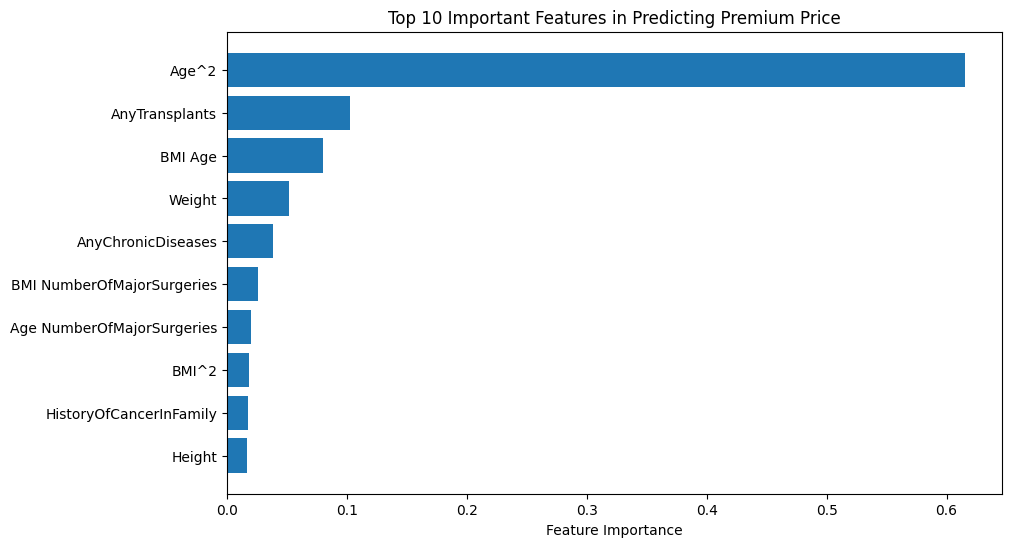

In [10]:
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features in Predicting Premium Price")
plt.show()


In [13]:
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create a Voting Regressor
ensemble_model = VotingRegressor([('rf', best_model), ('gb', gb_model)])
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)
print("Ensemble RMSE:", mean_squared_error(y_test, ensemble_predictions, squared=False))
print("Ensemble R^2 Score:", r2_score(y_test, ensemble_predictions))


Ensemble RMSE: 2123.849909879409
Ensemble R^2 Score: 0.8942203763980445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
import joblib

# Save the model to a file
joblib.dump(ensemble_model, 'premium_price_model.pkl')

# Load the model (for future predictions)
# loaded_model = joblib.load('premium_price_model.pkl')
# predictions = loaded_model.predict(new_data)


['premium_price_model.pkl']